In [19]:

from litellm import completion


ollama_llm = completion(
            model="ollama/llama3.1:8b",#"ollama/gemma3:4b",
            api_base="http://localhost:11434"
            )

/Users/tharhtet/.local/share/virtualenvs/Agentic_RAG_projs-hQf1ctZM/lib/python3.10/site-packages/httpx/_content.py:204: DeprecationWarning: Use 'content=<...>' to upload raw bytes/text content.
  warnings.warn(message, DeprecationWarning)


In [20]:
from crewai_tools import SerperDevTool

search_tool = SerperDevTool()


In [21]:
from crewai import Agent, Task, Crew
from PIL import Image

In [23]:
product_text = "Eco-friendly reusable water bottle made of stainless steel, 1-liter capacity, keeps water cold for 24 hours."
product_image_path = "bottle_2.png"  



<class 'PIL.PngImagePlugin.PngImageFile'>


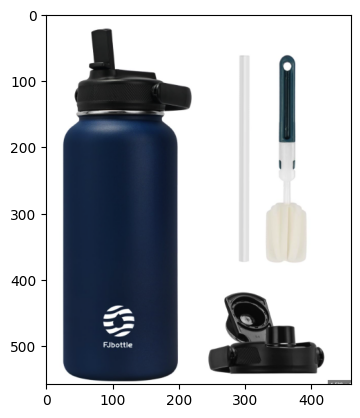

In [24]:
from matplotlib import pyplot as plt
product_image = Image.open(product_image_path)
print(type(product_image))
plt.imshow(product_image)

In [25]:
description_agent = Agent(
    role="Product Description Specialist",
    goal="Write an engaging product listing for an eCommerce platform",
    backstory="Expert in writing compelling listings that convert.",
    verbose=True,
    llm=ollama_llm
)

In [26]:
seo_agent = Agent(
    role="SEO Specialist",
    goal="Generate SEO keywords for the product",
    backstory="Specialized in keyword strategy for eCommerce.",
    verbose=True,
    llm=ollama_llm
)

In [27]:
banner_agent = Agent(
    role="Marketing Copywriter",
    goal="Create a banner caption that grabs attention",
    backstory="Experienced in creating punchy taglines for visual ads.",
    verbose=True,
    llm=ollama_llm
)


#### Creating Tasks

In [28]:
# Task 1: Generate listing
task1 = Task(
    description=(
        "Using the product description and image path, write an engaging product listing. "
        "Description: '{product_text}' | Image path: '{product_image_path}'"
    ),
    expected_output="A product listing paragraph describing the benefits and features.",
    agent=description_agent
)


In [29]:
# Task 2: Generate SEO Keywords
task2 = Task(
    description="Using the image and product description, generate 10 relevant SEO keywords.",
    expected_output="A list of 10 SEO keywords or phrases for eCommerce platforms.",
    agent=seo_agent
)


In [31]:
# Task 3: Create Banner Headline
task3 = Task(
    description=(
        "Generate 10 SEO keywords based on the following product info: "
        "Text: '{product_text}' | Image file path: '{product_image_path}'"
    ),
    expected_output="A list of 10 SEO-friendly keywords.",
    agent=seo_agent
)


In [ ]:
# Crew with multimodal input
crew = Crew(
    agents=[description_agent, seo_agent, banner_agent],
    tasks=[task1, task2, task3],
    verbose=True
)

In [42]:
product_text = "Eco-friendly reusable water bottle made of stainless steel, 1-liter capacity, keeps water cold for 24 hours."
product_image_path = "bottle_2.png"  



product_text = ""
product_image_path = "gpu.png"  

In [43]:
user_input = {
    "product_text": product_text,
    "product_image_path": product_image_path
}

In [44]:
result = crew.kickoff(inputs=user_input)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 7ebd5f91-ca4c-49c8-b84d-86396dcb2eac                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
       Status: Executing Task...
    └── 🤖 Agent: Product Description Specialist
            Status: In Progress

# Agent: Product Description Specialist
## Task: Using the product description and image path, write an engaging product listing. Description: '' | Image path: 'gpu.png'


# Agent: Product Description Specialist
## Final Answer: 
I now can give a great answer. 

**Product Listing:**

"Unlock the Power of Your Gaming Experience with Our High-Performance Graphics Processing Unit (GPU)!

Are you tired of laggy graphics and slow gameplay? Do you want to take your gaming experience to the next level? Look no further! Our GPU is designed to provide unparalleled performance, speed, and power. With its advanced architecture and cutting-edge technology, this GPU delivers smooth and seamless gaming experiences.

With our GPU, you can enjoy:

• **4K Resolution**: Experience stunning visuals with 4 times the resolution of Full HD
• **Fast Frame Rates**: Enjoy silky-smooth gameplay with high frame rates
• **Improved Graphics Quality**: Enhanced textures, details, and lighting effects for a more imm

🚀 Crew: crew
└── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
       Status: Executing Task...
    └── 🤖 Agent: Product Description Specialist
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
       Assigned to: Product Description Specialist
       Status: ✅ Completed
    └── 🤖 Agent: Product Description Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 17525ae1-c449-454d-8d5d-d506a60f43a9                                                                     │
│  Agent: Product Description Specialist                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: In Progress

# Agent: SEO Specialist
## Task: Using the image and product description, generate 10 relevant SEO keywords.


# Agent: SEO Specialist
## Final Answer: 
1. High-Performance GPU
2. Gaming Graphics Card
3. 4K Resolution GPU
4. Fast Frame Rates Graphics Card
5. Improved Graphics Quality PC Component
6. Unparalleled Gaming Experience
7. Advanced GPU Architecture
8. Cutting-Edge Technology Gaming Solution
9. Smooth and Seamless Gameplay
10. High-Speed Graphics Processing Unit




🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
└── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
       Assigned to: SEO Specialist
       Status: ✅ Completed
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: e7f8333b-d261-462e-a818-4906f28ddc64                                                                     │
│  Agent: SEO Specialist                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: daf142a4-9feb-4dee-851a-f2a8f9a65984
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: daf142a4-9feb-4dee-851a-f2a8f9a65984
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: In Progress

# Agent: SEO Specialist
## Task: Generate 10 SEO keywords based on the following product info: Text: '' | Image file path: 'gpu.png'


# Agent: SEO Specialist
## Final Answer: 
1. High-Performance GPU
2. Gaming Graphics Card
3. 4K Resolution GPU
4. Fast Frame Rates Graphics Card
5. Improved Graphics Quality PC Component
6. Unparalleled Gaming Experience
7. Advanced GPU Architecture
8. Cutting-Edge Technology Gaming Solution
9. Smooth and Seamless Gameplay
10. High-Speed Graphics Processing Unit




🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: daf142a4-9feb-4dee-851a-f2a8f9a65984
       Status: Executing Task...
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 17525ae1-c449-454d-8d5d-d506a60f43a9
│      Assigned to: Product Description Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: Product Description Specialist
│           Status: ✅ Completed
├── 📋 Task: e7f8333b-d261-462e-a818-4906f28ddc64
│      Assigned to: SEO Specialist
│      Status: ✅ Completed
│   └── 🤖 Agent: SEO Specialist
│           Status: ✅ Completed
└── 📋 Task: daf142a4-9feb-4dee-851a-f2a8f9a65984
       Assigned to: SEO Specialist
       Status: ✅ Completed
    └── 🤖 Agent: SEO Specialist
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: daf142a4-9feb-4dee-851a-f2a8f9a65984                                                                     │
│  Agent: SEO Specialist                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 7ebd5f91-ca4c-49c8-b84d-86396dcb2eac                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [48]:
print(result.raw) #result.raw

1. High-Performance GPU
2. Gaming Graphics Card
3. 4K Resolution GPU
4. Fast Frame Rates Graphics Card
5. Improved Graphics Quality PC Component
6. Unparalleled Gaming Experience
7. Advanced GPU Architecture
8. Cutting-Edge Technology Gaming Solution
9. Smooth and Seamless Gameplay
10. High-Speed Graphics Processing Unit


In [51]:
print(result.tasks_output) #result

[TaskOutput(description="Using the product description and image path, write an engaging product listing. Description: '' | Image path: 'gpu.png'", name=None, expected_output='A product listing paragraph describing the benefits and features.', summary='Using the product description and image path, write an engaging...', raw='I now can give a great answer. \n\n**Product Listing:**\n\n"Unlock the Power of Your Gaming Experience with Our High-Performance Graphics Processing Unit (GPU)!\n\nAre you tired of laggy graphics and slow gameplay? Do you want to take your gaming experience to the next level? Look no further! Our GPU is designed to provide unparalleled performance, speed, and power. With its advanced architecture and cutting-edge technology, this GPU delivers smooth and seamless gaming experiences.\n\nWith our GPU, you can enjoy:\n\n• **4K Resolution**: Experience stunning visuals with 4 times the resolution of Full HD\n• **Fast Frame Rates**: Enjoy silky-smooth gameplay with high 

In [53]:
print(result.tasks_output[0]) #result

I now can give a great answer. 

**Product Listing:**

"Unlock the Power of Your Gaming Experience with Our High-Performance Graphics Processing Unit (GPU)!

Are you tired of laggy graphics and slow gameplay? Do you want to take your gaming experience to the next level? Look no further! Our GPU is designed to provide unparalleled performance, speed, and power. With its advanced architecture and cutting-edge technology, this GPU delivers smooth and seamless gaming experiences.

With our GPU, you can enjoy:

• **4K Resolution**: Experience stunning visuals with 4 times the resolution of Full HD
• **Fast Frame Rates**: Enjoy silky-smooth gameplay with high frame rates
• **Improved Graphics Quality**: Enhanced textures, details, and lighting effects for a more immersive experience

Whether you're a casual gamer or an enthusiast, our GPU is designed to meet your needs. Upgrade your gaming setup today and discover a new world of possibilities!

**Product Image:** [Insert 'gpu.png' image here

In [47]:
print("✅ Final Output:\n", result)


✅ Final Output:
 1. High-Performance GPU
2. Gaming Graphics Card
3. 4K Resolution GPU
4. Fast Frame Rates Graphics Card
5. Improved Graphics Quality PC Component
6. Unparalleled Gaming Experience
7. Advanced GPU Architecture
8. Cutting-Edge Technology Gaming Solution
9. Smooth and Seamless Gameplay
10. High-Speed Graphics Processing Unit


In [56]:
# Convert image to base64
import base64
def image_file_to_base64(file_path):
    with open(file_path, "rb") as image_file:
        data = base64.b64encode(image_file.read())

    return data.decode('utf-8')


image_file_to_base64("gpu.png")

'iVBORw0KGgoAAAANSUhEUgAAAjAAAAGmCAYAAABiJr6sAAAEDmlDQ1BrQ0dDb2xvclNwYWNlR2VuZXJpY1JHQgAAOI2NVV1oHFUUPpu5syskzoPUpqaSDv41lLRsUtGE2uj+ZbNt3CyTbLRBkMns3Z1pJjPj/KRpKT4UQRDBqOCT4P9bwSchaqvtiy2itFCiBIMo+ND6R6HSFwnruTOzu5O4a73L3PnmnO9+595z7t4LkLgsW5beJQIsGq4t5dPis8fmxMQ6dMF90A190C0rjpUqlSYBG+PCv9rt7yDG3tf2t/f/Z+uuUEcBiN2F2Kw4yiLiZQD+FcWyXYAEQfvICddi+AnEO2ycIOISw7UAVxieD/Cyz5mRMohfRSwoqoz+xNuIB+cj9loEB3Pw2448NaitKSLLRck2q5pOI9O9g/t/tkXda8Tbg0+PszB9FN8DuPaXKnKW4YcQn1Xk3HSIry5ps8UQ/2W5aQnxIwBdu7yFcgrxPsRjVXu8HOh0qao30cArp9SZZxDfg3h1wTzKxu5E/LUxX5wKdX5SnAzmDx4A4OIqLbB69yMesE1pKojLjVdoNsfyiPi45hZmAn3uLWdpOtfQOaVmikEs7ovj8hFWpz7EV6mel0L9Xy23FMYlPYZenAx0yDB1/PX6dledmQjikjkXCxqMJS9WtfFCyH9XtSekEF+2dH+P4tzITduTygGfv58a5VCTH5PtXD7EFZiNyUDBhHnsFTBgE0SQIA9pfFtgo6cKGuhooeilaKH41eDs38Ip+f4At1Rq/sjr6NEwQqb/I/DQqsLvaFUjvAx+eWirddAJZnAj1DFJL0mSg/gcIpPkMBkhoyCSJ8lTZIxk0TpKDjXHliJzZPO50dR5ASNSnzeLvIvod0HG/mdkmOC0z8VKnzcQ2M/Yz2vKldduXjp9bleLu0ZWn7vWc+l0JGcaai10yNrUnXLP/8Jf59ewX+c3Wgz+B34Df+vbVrc16zTMVgp9um9bxEf